In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
enrollment_df = pd.read_csv("../data/2017-18__-_2021-22_Demographic_Snapshot_20240410.csv")

In [43]:
enrollment_df.head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,89.0%
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,88.8%
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,86.7%
3,01M015,P.S. 015 Roberto Clemente,2020-21,193,0,17,29,29,27,30,...,0.057,0,0.0,44,0.228,21,0.109,161,83.4%,86.4%
4,01M015,P.S. 015 Roberto Clemente,2021-22,179,0,15,30,26,24,22,...,0.067,0,0.0,38,0.212,11,0.061,150,83.8%,87.9%


In [44]:
enrollment_df['Year'].unique()

array(['2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
      dtype=object)

In [45]:
enrollment_df['Economic Need Index'].unique()

array(['89.0%', '88.8%', '86.7%', '86.4%', '87.9%', '67.9%', '68.7%',
       '70.4%', '69.6%', '67.8%', '80.0%', '75.4%', '78.4%', '77.0%',
       '75.3%', '93.7%', '94.8%', 'Above 95%', '94.4%', '76.2%', '73.7%',
       '76.5%', '88.2%', '89.5%', '91.6%', '90.3%', '86.3%', '58.0%',
       '59.4%', '62.7%', '65.1%', '66.3%', '90.1%', '94.6%', '94.2%',
       '91.3%', '90.0%', '93.3%', '92.5%', '91.7%', '91.1%', '91.2%',
       '90.2%', '90.7%', '89.7%', '65.3%', '67.2%', '67.1%', '65.5%',
       '62.1%', '89.9%', '87.5%', '87.8%', '83.4%', '84.2%', '36.9%',
       '34.9%', '38.2%', '39.8%', '43.8%', '84.8%', '81.6%', '81.7%',
       '85.3%', '84.9%', '50.5%', '53.4%', '53.6%', '54.6%', '52.1%',
       '47.8%', '46.0%', '46.2%', '49.1%', '55.4%', '57.9%', '57.2%',
       '60.7%', '85.4%', '82.9%', '82.8%', '85.0%', '83.1%', '80.2%',
       '62.9%', '65.4%', '64.7%', '65.0%', '92.4%', '94.1%', '28.2%',
       '26.9%', '29.1%', '28.7%', '25.6%', '85.5%', '88.6%', '41.4%',
       '40.6%', 

In [46]:
# replacing "Above 95%" to "95%"
enrollment_df['Economic Need Index'] = enrollment_df['Economic Need Index'].replace({'Above 95%' : '95%'})

In [47]:
enrollment_df['Economic Need Index'] = enrollment_df['Economic Need Index'].str.rstrip('%').astype('float') / 100

In [48]:
enrollment_df.head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,0.890
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,0.888
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,0.867
3,01M015,P.S. 015 Roberto Clemente,2020-21,193,0,17,29,29,27,30,...,0.057,0,0.0,44,0.228,21,0.109,161,83.4%,0.864
4,01M015,P.S. 015 Roberto Clemente,2021-22,179,0,15,30,26,24,22,...,0.067,0,0.0,38,0.212,11,0.061,150,83.8%,0.879


In [49]:
enrollment_df[['DBN',"Year","Total Enrollment","Economic Need Index"]]

,DBN,Year,Total Enrollment,Economic Need Index
0,01M015,2017-18,190,0.890
1,01M015,2018-19,174,0.888
2,01M015,2019-20,190,0.867
3,01M015,2020-21,193,0.864
4,01M015,2021-22,179,0.879
...,...,...,...,...
9246,84X730,2017-18,314,0.891
9247,84X730,2018-19,430,0.888
9248,84X730,2019-20,523,0.892
9249,84X730,2020-21,626,0.889


In [50]:
enrollment_df[['DBN','Year',"Economic Need Index"]].sort_values(by='Economic Need Index', ascending=False)

,DBN,Year,Economic Need Index
3075,12X211,2020-21,0.950
3007,12X044,2017-18,0.950
1183,05M286,2020-21,0.950
1184,05M286,2021-22,0.950
3036,12X067,2021-22,0.950
...,...,...,...
284,02M183,2021-22,0.068
283,02M183,2020-21,0.068
3754,15K321,2021-22,0.067
282,02M183,2019-20,0.064


In [51]:
highEN = enrollment_df[enrollment_df['Economic Need Index'] == 0.950]
highEN[['DBN', 'Year', 'Total Enrollment', 'Economic Need Index']]

,DBN,Year,Total Enrollment,Economic Need Index
17,01M034,2019-20,296,0.95
18,01M034,2020-21,273,0.95
39,01M134,2021-22,177,0.95
55,01M188,2017-18,433,0.95
56,01M188,2018-19,407,0.95
...,...,...,...,...
8959,84X394,2017-18,398,0.95
8961,84X394,2019-20,499,0.95
8962,84X394,2020-21,501,0.95
8963,84X394,2021-22,492,0.95


In [52]:
groupedEN = highEN.groupby('DBN')
groupedEN['Total Enrollment'].mean()

DBN
01M034    284.5
01M134    177.0
01M188    399.6
01M515    523.0
02M394    287.8
          ...  
84M388    294.0
84X177    264.0
84X200    226.5
84X394    472.5
84X633     19.0
Name: Total Enrollment, Length: 207, dtype: float64

In [53]:
#   plt.figure(figsize=(10, 5))
#   group.sort_values('Year', inplace=True)
#   plt.plot(group['Year'], group['Total Enrollment'], marker='o', label=f'Total Enrollment for {name}')
#   plt.title(f'Total Enrollment over Years for {name}')
#   plt.xlabel('Year')
#   plt.ylabel('Total Enrollment')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

Text(0, 0.5, 'Enrollment')

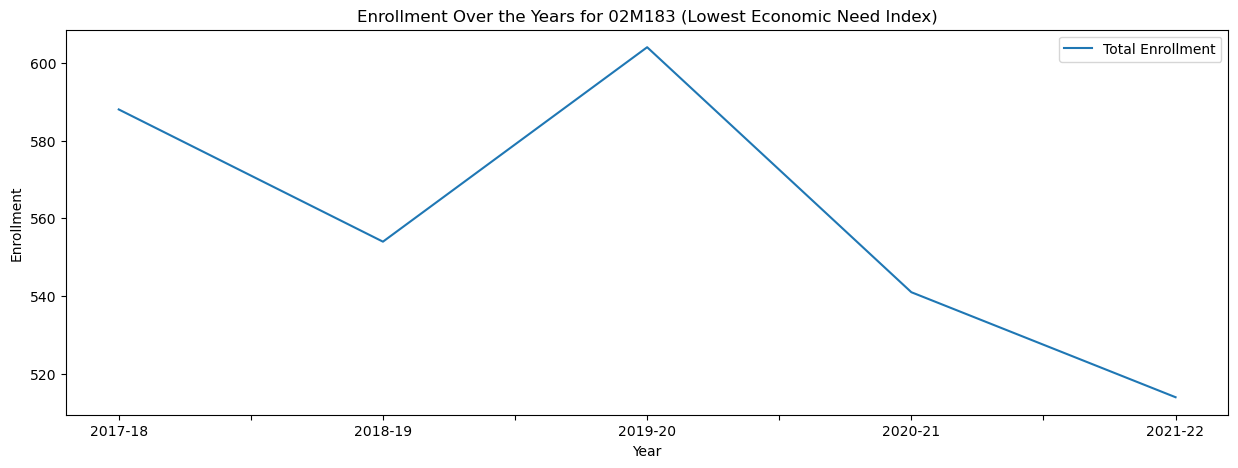

In [54]:
ax = enrollment_df[enrollment_df['DBN']=='02M183'].plot.line(
    x='Year',
    y='Total Enrollment',
    figsize=(15,5),
    title='Enrollment Over the Years for 02M183 (Lowest Economic Need Index)'
)
ax.set_ylabel('Enrollment')

Text(0, 0.5, 'Enrollment')

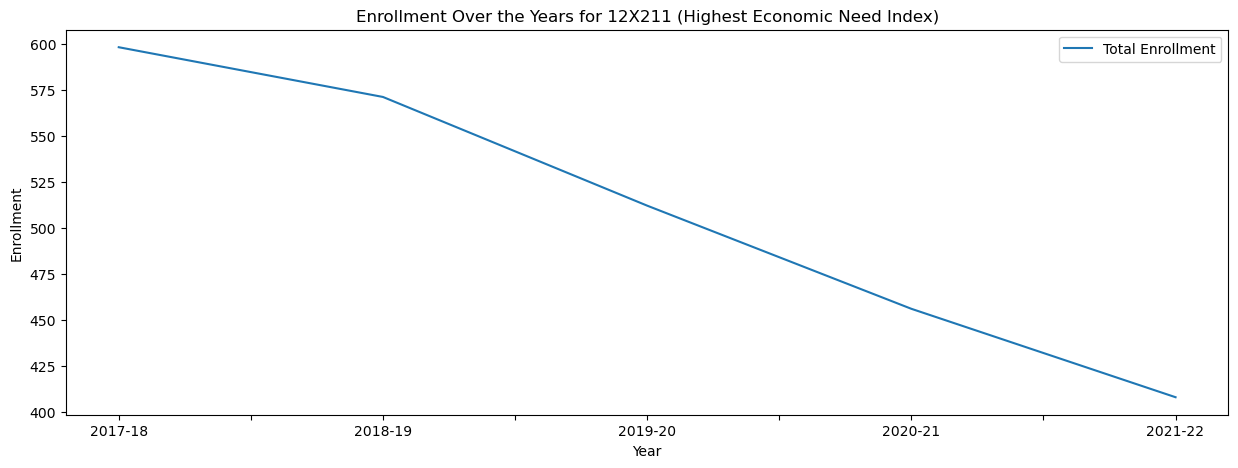

In [55]:
ax = enrollment_df[enrollment_df['DBN']=='12X211'].plot.line(
    x='Year',
    y='Total Enrollment',
    figsize=(15,5),
    title='Enrollment Over the Years for 12X211 (Highest Economic Need Index)'
)
ax.set_ylabel('Enrollment')

In [56]:
enrollment_df.columns

Index(['DBN', 'School Name', 'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

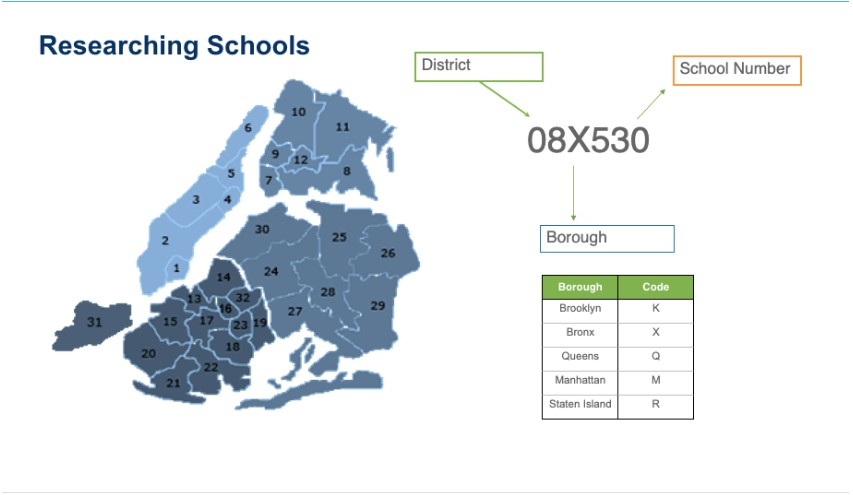

In [57]:
enrollment_df[['DBN','Year', 'Total Enrollment', 'Economic Need Index']]

,DBN,Year,Total Enrollment,Economic Need Index
0,01M015,2017-18,190,0.890
1,01M015,2018-19,174,0.888
2,01M015,2019-20,190,0.867
3,01M015,2020-21,193,0.864
4,01M015,2021-22,179,0.879
...,...,...,...,...
9246,84X730,2017-18,314,0.891
9247,84X730,2018-19,430,0.888
9248,84X730,2019-20,523,0.892
9249,84X730,2020-21,626,0.889


In [58]:
enrollment_df = enrollment_df.drop(['School Name','Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty'], axis=1)

In [59]:
enrollment_df

,DBN,Year,Total Enrollment,Economic Need Index
0,01M015,2017-18,190,0.890
1,01M015,2018-19,174,0.888
2,01M015,2019-20,190,0.867
3,01M015,2020-21,193,0.864
4,01M015,2021-22,179,0.879
...,...,...,...,...
9246,84X730,2017-18,314,0.891
9247,84X730,2018-19,430,0.888
9248,84X730,2019-20,523,0.892
9249,84X730,2020-21,626,0.889


In [60]:
enrollment_df = enrollment_df[enrollment_df['Year'].isin(['2019-20', '2020-21', '2021-22'])]
enrollment_df = enrollment_df.pivot(index='DBN', columns='Year', values=['Economic Need Index', 'Total Enrollment'])


In [61]:
enrollment_df

       Economic Need Index                 Total Enrollment                
Year               2019-20 2020-21 2021-22          2019-20 2020-21 2021-22
DBN                                                                        
01M015               0.867   0.864   0.879            190.0   193.0   179.0
01M019               0.704   0.696   0.678            236.0   212.0   176.0
01M020               0.784   0.770   0.753            464.0   412.0   351.0
01M034               0.950   0.950   0.944            296.0   273.0   258.0
01M063               0.784   0.765   0.704            229.0   208.0   186.0
...                    ...     ...     ...              ...     ...     ...
84X705               0.899   0.901   0.917            405.0   416.0   392.0
84X706               0.890   0.869   0.895            663.0   647.0   587.0
84X717               0.824   0.847   0.848            323.0   328.0   314.0
84X718               0.645   0.639   0.631            571.0   570.0   572.0
84X730      

In [62]:
# enrollment_df['ENI_Diff_2020'] = enrollment_df[('Economic Need Index', '2020-21')] - enrollment_df[('Economic Need Index', '2019-20')]
# enrollment_df['Enroll_Diff_2020'] = enrollment_df[('Total Enrollment', '2020-21')] - enrollment_df[('Total Enrollment', '2019-20')]
# enrollment_df['ENI_Diff_2021'] = enrollment_df[('Economic Need Index', '2021-22')] - enrollment_df[('Economic Need Index', '2020-21')]
# enrollment_df['Enroll_Diff_2021'] = enrollment_df[('Total Enrollment', '2021-22')] - enrollment_df[('Total Enrollment', '2020-21')]

In [63]:
# Plotting changes in Economic Need Index for 2020
# sns.barplot(x=enrollment_df.index, y='ENI_Diff_2020', data=enrollment_df)
# plt.title('Change in Economic Need Index in 2020')
# plt.xticks(rotation=45)
# plt.show()

# Plotting changes in Total Enrollment for 2020
# sns.barplot(x=enrollment_df.index, y='Enroll_Diff_2020', data=enrollment_df)
# plt.title('Change in Total Enrollment in 2020')
# plt.xticks(rotation=45)
# plt.show()

In [64]:
enrollment_df.columns

MultiIndex([('Economic Need Index', '2019-20'),
            ('Economic Need Index', '2020-21'),
            ('Economic Need Index', '2021-22'),
            (   'Total Enrollment', '2019-20'),
            (   'Total Enrollment', '2020-21'),
            (   'Total Enrollment', '2021-22')],
           names=[None, 'Year'])

In [65]:
enrollment_df = enrollment_df.reset_index()

In [66]:
enrollment_df['District'] = enrollment_df['DBN'].str[:2]
enrollment_df['Borough'] = enrollment_df['DBN'].str[2]

In [67]:
grouped_df = enrollment_df.groupby(['District', 'Borough']).agg({
    ('Economic Need Index', '2019-20'): 'mean',
    ('Economic Need Index', '2020-21'): 'mean',
    ('Economic Need Index', '2021-22'): 'mean',
    ('Total Enrollment', '2019-20'): 'sum',
    ('Total Enrollment', '2020-21'): 'sum',
    ('Total Enrollment', '2021-22'): 'sum',
}).reset_index()

In [68]:
# flattening the multiIndex for columns and creating a single level of columns
grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns] 

In [69]:
print(grouped_df.columns)

Index(['District', 'Borough', 'Economic Need Index_2019-20',
       'Economic Need Index_2020-21', 'Economic Need Index_2021-22',
       'Total Enrollment_2019-20', 'Total Enrollment_2020-21',
       'Total Enrollment_2021-22'],
      dtype='object')


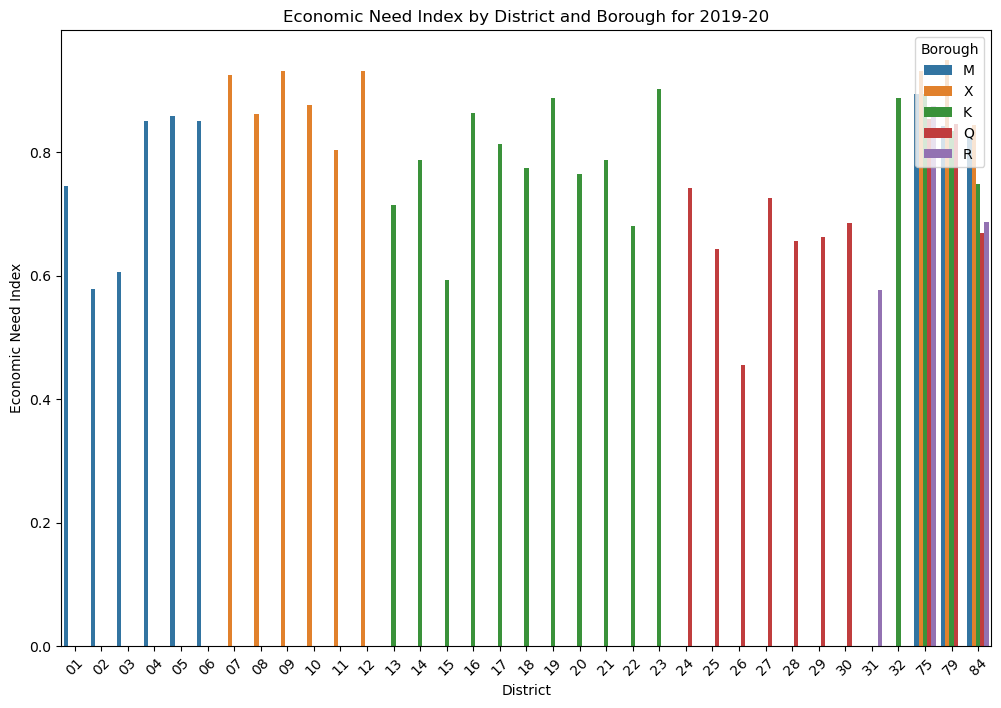

In [70]:
plt.figure(figsize=(12, 8))
sns.barplot(x='District', y='Economic Need Index_2019-20', hue='Borough', data=grouped_df)
plt.title('Economic Need Index by District and Borough for 2019-20')
plt.xlabel('District')
plt.ylabel('Economic Need Index')
plt.xticks(rotation=45)
plt.show()

NYC Public Schools has divided the city into 32 geographic districts, and two citywide districts: District 75 for students with moderate to severe learning disabilities, and District 79 for students in the city’s alternative schools and programs district.  

Every borough except Staten Island is divided into several districts: 

Manhattan: Districts 1, 2, 3, 4, 5, and 6 
The Bronx: Districts 7, 8, 9, 10, 11, and 12 
Brooklyn: Districts 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, and 32 
Queens: Districts 24, 25, 26, 27, 28, 29, and 30
Staten Island: District 31

In [71]:
grouped_df = grouped_df.melt(id_vars=['District', 'Borough'], value_vars=['Total Enrollment_2019-20', 'Total Enrollment_2020-21', 'Total Enrollment_2021-22'], var_name='Year', value_name='Total Enrollment')

# Year column
grouped_df['Year'] = grouped_df['Year'].str[-7:]

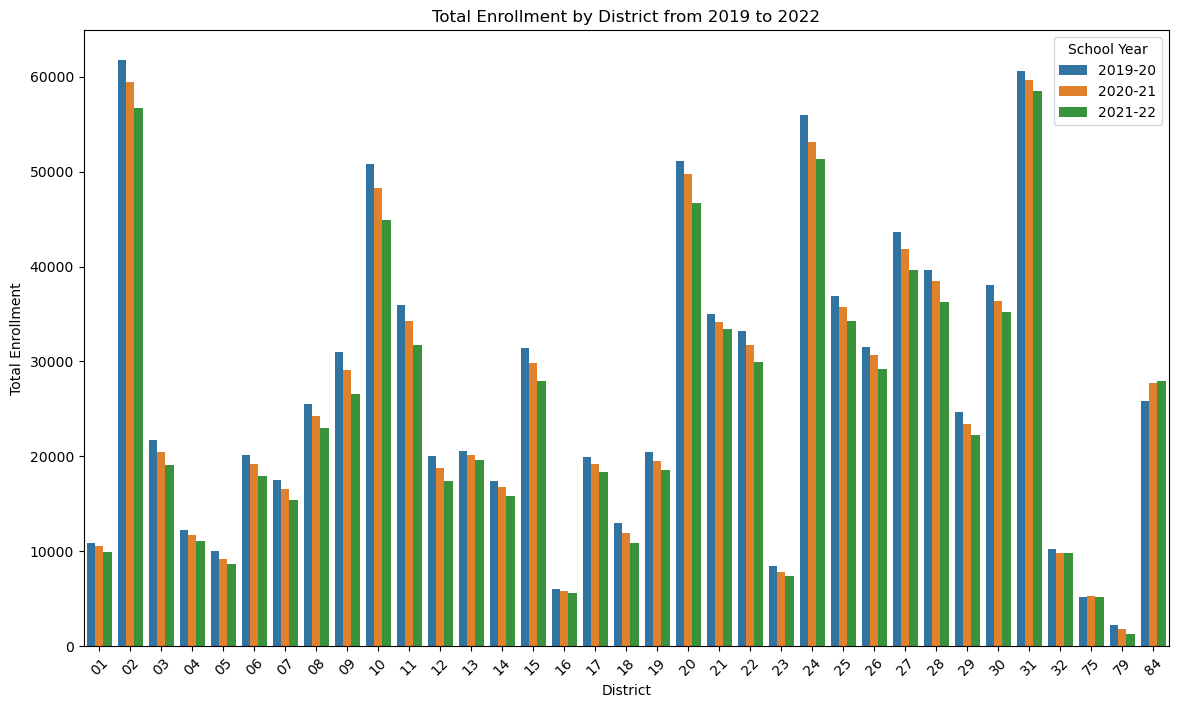

In [72]:
plt.figure(figsize=(14, 8))

sns.barplot(data=grouped_df, x='District', y='Total Enrollment', hue='Year', errorbar=None) 
plt.title('Total Enrollment by District from 2019 to 2022')
plt.xlabel('District')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.legend(title='School Year')
plt.show()

In [73]:
print(enrollment_df.columns)

MultiIndex([(                'DBN',        ''),
            ('Economic Need Index', '2019-20'),
            ('Economic Need Index', '2020-21'),
            ('Economic Need Index', '2021-22'),
            (   'Total Enrollment', '2019-20'),
            (   'Total Enrollment', '2020-21'),
            (   'Total Enrollment', '2021-22'),
            (           'District',        ''),
            (            'Borough',        '')],
           names=[None, 'Year'])


In [74]:
enrollment_df

DBN Economic Need Index                 Total Enrollment          \
Year                     2019-20 2020-21 2021-22          2019-20 2020-21   
0     01M015               0.867   0.864   0.879            190.0   193.0   
1     01M019               0.704   0.696   0.678            236.0   212.0   
2     01M020               0.784   0.770   0.753            464.0   412.0   
3     01M034               0.950   0.950   0.944            296.0   273.0   
4     01M063               0.784   0.765   0.704            229.0   208.0   
...      ...                 ...     ...     ...              ...     ...   
1877  84X705               0.899   0.901   0.917            405.0   416.0   
1878  84X706               0.890   0.869   0.895            663.0   647.0   
1879  84X717               0.824   0.847   0.848            323.0   328.0   
1880  84X718               0.645   0.639   0.631            571.0   570.0   
1881  84X730               0.892   0.889   0.903            523.0   626.0   

             District Borough  
Year 2021-22                   
0      179.0       01       M  
1      176.0       01       M  
2      351.0       01       M  
3      258.0       01       M  
4      186.0       01       M  
...      ...      ...     ...  
1877   392.0       84       X  
1878   587.0       84       X  
1879   314.0       84       X  
1880   572.0       84       X  
1881   598.0       84       X  

[1882 rows x 9 columns]

In [75]:
# flattening the multi index columns for tableau
enrollment_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in enrollment_df.columns]

In [76]:
enrollment_df.to_csv('transformed_enrollment.csv', index=False)

In [2]:
attendance_df = pd.read_csv('../data/2018-2021_Daily_Attendance_by_School_20240410.csv')

In [3]:
attendance_df.sample(5)

,School DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
54790,04M038,09/20/2019,20192020,245.0,221.0,24.0,0.0
467039,02M255,2020-10-15T00:00:00.000,20202021,357.0,356.0,1.0,0.0
456920,01M063,2020-12-02T00:00:00.000,20202021,209.0,190.0,19.0,0.0
102399,32K347,01/22/2019,20182019,313.0,270.0,42.0,1.0
80457,23K298,02/07/2019,20182019,288.0,272.0,16.0,0.0


In [4]:
attendance_df.rename(columns={'School DBN':'DBN','SchoolYear' : 'Year'}, inplace=True)

In [5]:
attendance_df.sample(10)

,DBN,Date,Year,Enrolled,Present,Absent,Released
455000,22K425,12/17/2019,20192020,3867.0,3680.0,184.0,3.0
469176,02M297,2020-12-10T00:00:00.000,20202021,817.0,741.0,76.0,0.0
68290,28Q332,01/31/2020,20192020,270.0,245.0,25.0,0.0
663337,25Q263,2021-04-27T00:00:00.000,20202021,420.0,404.0,16.0,0.0
151592,18K208,05/23/2019,20182019,377.0,332.0,45.0,0.0
708328,30Q555,2021-05-20T00:00:00.000,20202021,708.0,536.0,172.0,0.0
367647,22K312,06/07/2019,20182019,784.0,739.0,45.0,0.0
421831,22K278,06/12/2019,20182019,1195.0,1053.0,142.0,0.0
382292,31R013,11/21/2018,20182019,861.0,792.0,69.0,0.0
512302,07X381,2021-04-21T00:00:00.000,20202021,123.0,78.0,45.0,0.0


In [6]:
attendance_df = attendance_df.drop('Released',axis=1)

In [7]:
attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [8]:
attendance_df['Date'] = attendance_df['Date'].str.split('T').str[0]
# splitting "Time" 'T00:00:00.000' to only have the date

attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [9]:
# date format

def dates(date):
    for fmt in ("%Y-%m-%d", "%m/%d/%Y"):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  

attendance_df['Date'] = attendance_df['Date'].apply(dates)

attendance_df['Date'].sample(10)

22770    2019-03-14
294711   2019-09-23
177964   2018-10-22
479616   2021-06-22
436530   2020-01-10
139339   2019-06-14
117408   2019-01-14
675957   2021-05-25
208660   2019-10-30
511760   2021-03-19
Name: Date, dtype: datetime64[ns]

In [10]:
attendance_df.info()
attendance_df['Date'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736578 entries, 0 to 736577
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DBN       736578 non-null  object        
 1   Date      736578 non-null  datetime64[ns]
 2   Year      736578 non-null  int64         
 3   Enrolled  736471 non-null  float64       
 4   Present   736471 non-null  float64       
 5   Absent    736471 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 33.7+ MB


0

In [11]:
attendance_df['Year'].unique()

array([20182019, 20192020, 20202021], dtype=int64)

In [12]:
attendance_df['Year'] = attendance_df['Year'].astype(str)
# 20182019 -> 2018-19
attendance_df['Year'] = attendance_df['Year'].apply(lambda x: f"{x[:4]}-{x[6:]}")

In [13]:
attendance_df['Year'].unique()

array(['2018-19', '2019-20', '2020-21'], dtype=object)

In [89]:
# creating a month column and undoing the indexing
attendance_df.set_index('Date', inplace=True)
attendance_df['month'] = attendance_df.index.to_period('M')
attendance_df = attendance_df.reset_index()

In [90]:
# grouping by month and DBN
groupedAtt = attendance_df.set_index(['month','DBN'])
groupedAtt = groupedAtt.groupby(['month', 'DBN'])

groupedAtt.head(10)

Date     Year  Enrolled  Present  Absent
month   DBN                                                  
2018-09 15K896 2018-09-05  2018-19      14.0     14.0     0.0
        15K896 2018-09-06  2018-19      26.0     26.0     0.0
        15K896 2018-09-07  2018-19      26.0     25.0     1.0
        15K896 2018-09-12  2018-19      27.0     26.0     1.0
        15K896 2018-09-13  2018-19      28.0     27.0     1.0
...                   ...      ...       ...      ...     ...
2021-06 75X811 2021-06-09  2020-21     637.0    495.0   141.0
        75X811 2021-06-10  2020-21     637.0    502.0   135.0
        75X811 2021-06-11  2020-21     637.0    493.0   143.0
        75X811 2021-06-14  2020-21     637.0    489.0   147.0
        75X811 2021-06-15  2020-21     637.0    500.0   135.0

[428016 rows x 5 columns]

In [91]:
# getting the averages 

avg_enroll = groupedAtt['Enrolled'].mean().reset_index()
avg_present = groupedAtt['Present'].mean().reset_index()
avg_absent = groupedAtt['Absent'].mean().reset_index()

In [92]:
# School with Highest Economic Need Index - 12X211
# School with Lowest Economic Need  - 02M183

In [93]:
attendance = avg_enroll.merge(avg_present, on = ['month','DBN'])
attendance = attendance.merge(avg_absent, on = ['month', 'DBN'])


In [94]:
col_rename = {
    'Enrolled': 'avg_enrolled',
    'Present': 'avg_present',
    'Absent': 'avg_absent'
}
attendance.rename(columns= col_rename, inplace = True)
# attendance.sample(5)

In [95]:
attendance[attendance['DBN'] == '12X211']

,month,DBN,avg_enrolled,avg_present,avg_absent
614,2018-09,12X211,572.066667,545.666667,26.400000
2191,2018-10,12X211,571.818182,554.454545,17.363636
3768,2018-11,12X211,569.444444,541.833333,27.611111
5345,2018-12,12X211,567.333333,543.066667,24.266667
6922,2019-01,12X211,569.142857,534.571429,34.571429
8499,2019-02,12X211,569.928571,541.357143,26.785714
10076,2019-03,12X211,570.800000,544.950000,25.850000
11653,2019-04,12X211,572.812500,546.312500,26.500000
13230,2019-05,12X211,573.454545,548.681818,24.772727
14807,2019-06,12X211,568.933333,516.000000,52.933333


In [96]:
# plt.figure(figsize=(10,5))

# plt.plot(attendance['month'],attendance['avg_present'], marker='o', linestyle='-')
# plt.title('Average Monthly Present for DBN 12X211')
# plt.xlabel('Month')
# plt.ylabel('Average Monthly Present')

# plt.show()

Text(0, 0.5, 'Enrolled')

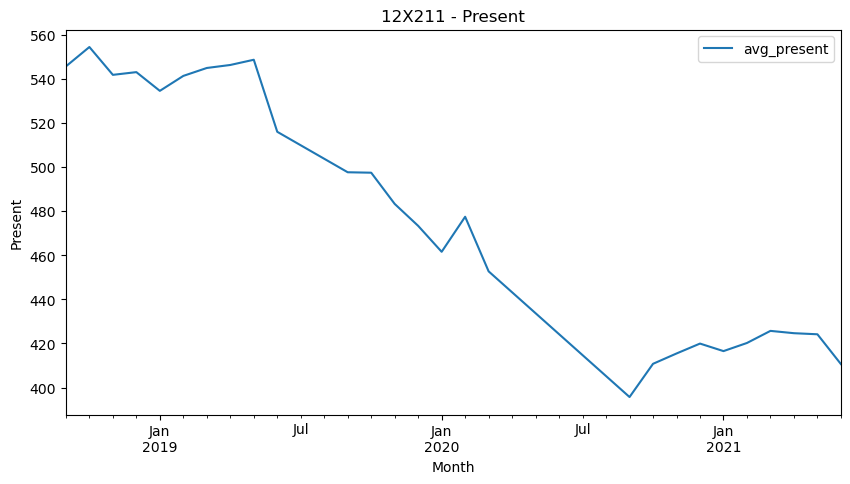

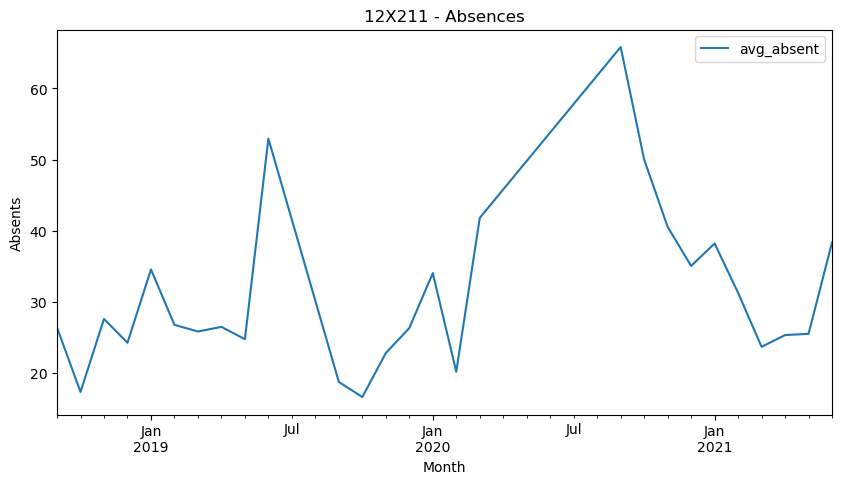

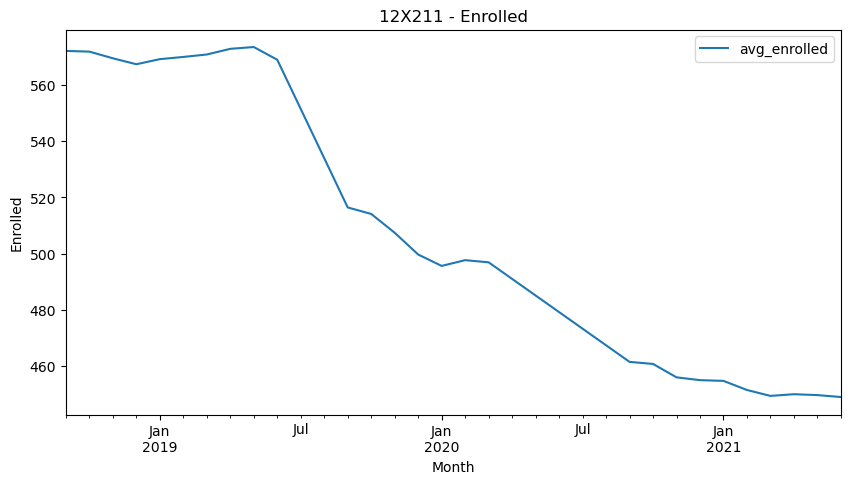

In [97]:
# School with Highest Economic Need  - 12X211
ax = attendance[attendance['DBN'] == '12X211'].plot.line(
    x = 'month',
    y = 'avg_present',
    figsize = (10,5),
    title = '12X211 - Present'
)
ax.set_xlabel('Month')
ax.set_ylabel('Present')

# 12X211 - Absences
ax = attendance[attendance['DBN'] == '12X211'].plot.line(
    x = 'month',
    y = 'avg_absent',
    figsize = (10,5),
    title = '12X211 - Absences'
)
ax.set_xlabel('Month')
ax.set_ylabel('Absents')

# 12X211 - Enrolled
ax = attendance[attendance['DBN'] == '12X211'].plot.line(
    x = 'month',
    y = 'avg_enrolled',
    figsize = (10,5),
    title = '12X211 - Enrolled'
)
ax.set_xlabel('Month')
ax.set_ylabel('Enrolled')

Text(0, 0.5, 'Enrolled')

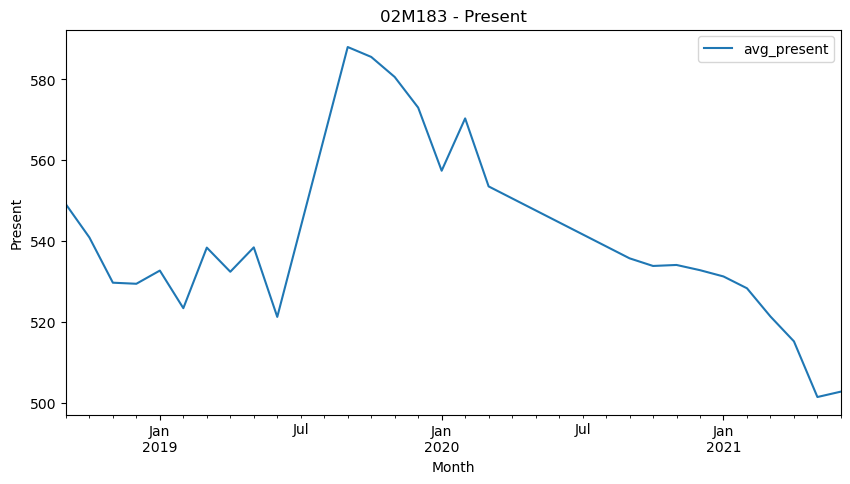

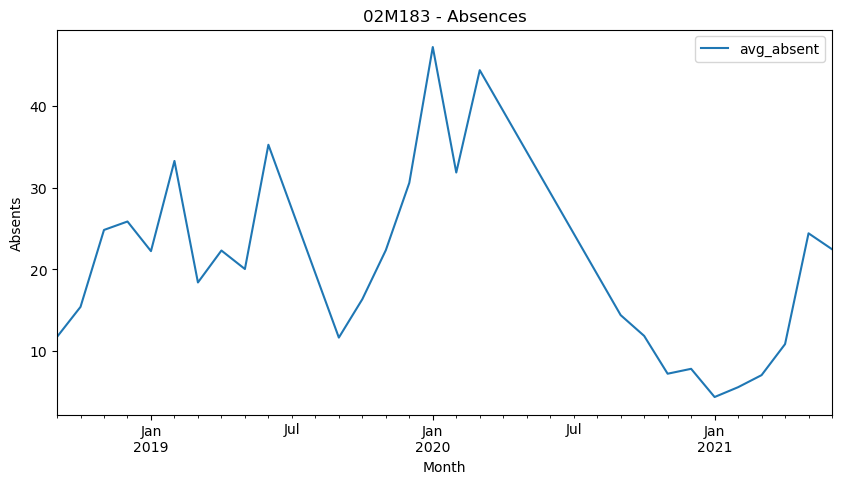

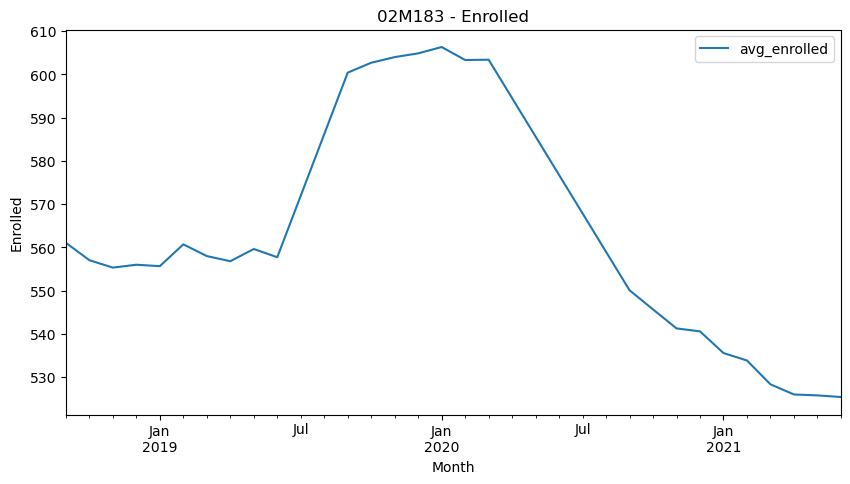

In [98]:
# School with Lowest Economic Need  - 02M183

ax = attendance[attendance['DBN'] == '02M183'].plot.line(
    x = 'month',
    y = 'avg_present',
    figsize = (10,5),
    title = '02M183 - Present'
)
ax.set_xlabel('Month')
ax.set_ylabel('Present')

# 12X211 - Absences
ax = attendance[attendance['DBN'] == '02M183'].plot.line(
    x = 'month',
    y = 'avg_absent',
    figsize = (10,5),
    title = '02M183 - Absences'
)
ax.set_xlabel('Month')
ax.set_ylabel('Absents')

# 12X211 - Enrolled
ax = attendance[attendance['DBN'] == '02M183'].plot.line(
    x = 'month',
    y = 'avg_enrolled',
    figsize = (10,5),
    title = '02M183 - Enrolled'
)
ax.set_xlabel('Month')
ax.set_ylabel('Enrolled')

In [99]:
attendance_df

,Date,DBN,Year,Enrolled,Present,Absent,month
0,2018-09-05,15K896,2018-19,14.0,14.0,0.0,2018-09
1,2018-09-06,15K896,2018-19,26.0,26.0,0.0,2018-09
2,2018-09-07,15K896,2018-19,26.0,25.0,1.0,2018-09
3,2018-09-12,15K896,2018-19,27.0,26.0,1.0,2018-09
4,2018-09-13,15K896,2018-19,28.0,27.0,1.0,2018-09
...,...,...,...,...,...,...,...
736573,2021-06-21,75X811,2020-21,637.0,470.0,161.0,2021-06
736574,2021-06-22,75X811,2020-21,633.0,440.0,164.0,2021-06
736575,2021-06-23,75X811,2020-21,633.0,434.0,170.0,2021-06
736576,2021-06-24,75X811,2020-21,633.0,427.0,176.0,2021-06


In [100]:
# same as enrollment df, getting the district and borough from DBN
attendance_df['District'] = attendance_df['DBN'].str[:2] 
attendance_df['Borough'] = attendance_df['DBN'].str[2]

In [101]:
attendance_df = attendance_df.groupby(['District','Borough','Year','month']).agg({
    'Present' : 'sum',
    'Absent': 'sum',
    'Enrolled' : 'sum'
}).reset_index()

In [102]:
attendance_df

,District,Borough,Year,month,Present,Absent,Enrolled
0,01,M,2018-19,2018-09,152653.0,11647.0,164301.0
1,01,M,2018-19,2018-10,224044.0,16777.0,241101.0
2,01,M,2018-19,2018-11,181007.0,17304.0,198346.0
3,01,M,2018-19,2018-12,150887.0,14584.0,165486.0
4,01,M,2018-19,2019-01,195029.0,22025.0,220156.0
...,...,...,...,...,...,...,...
994,75,X,2020-21,2021-02,85436.0,19422.0,104956.0
995,75,X,2020-21,2021-03,123462.0,26296.0,149772.0
996,75,X,2020-21,2021-04,124497.0,25067.0,149591.0
997,75,X,2020-21,2021-05,119009.0,22853.0,141901.0


In [103]:
attendance_df['Attendance Rate'] = attendance_df['Present'] / attendance_df ['Enrolled']

In [104]:
attendance_df

,District,Borough,Year,month,Present,Absent,Enrolled,Attendance Rate
0,01,M,2018-19,2018-09,152653.0,11647.0,164301.0,0.929106
1,01,M,2018-19,2018-10,224044.0,16777.0,241101.0,0.929254
2,01,M,2018-19,2018-11,181007.0,17304.0,198346.0,0.912582
3,01,M,2018-19,2018-12,150887.0,14584.0,165486.0,0.911781
4,01,M,2018-19,2019-01,195029.0,22025.0,220156.0,0.885867
...,...,...,...,...,...,...,...,...
994,75,X,2020-21,2021-02,85436.0,19422.0,104956.0,0.814017
995,75,X,2020-21,2021-03,123462.0,26296.0,149772.0,0.824333
996,75,X,2020-21,2021-04,124497.0,25067.0,149591.0,0.832249
997,75,X,2020-21,2021-05,119009.0,22853.0,141901.0,0.838676


In [105]:
attendance_df['month'] = attendance_df['month'].astype(str)

In [106]:
# replace infinite values with NaN
attendance_df['Attendance Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [121]:
# dropping rows with NaN values in columns
attendance_df.dropna(subset=['Attendance Rate', 'month', 'Borough'], inplace=True)

KeyError: ['Attendance Rate', 'month', 'Borough']

In [120]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=attendance_df, x='month', y='Attendance Rate', hue='Borough', marker='o')
plt.title('Monthly Attendance Rate by Borough (2018-2021)')
plt.xlabel('Month')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.legend(title='Borough')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `month` for parameter `x`

<Figure size 1400x800 with 0 Axes>

In [119]:
plt.figure(figsize=(14, 8))
sns.barplot(data=attendance_df, x='month', y='Enrolled', hue='Year',errorbar=None)
plt.title('Total Enrollment by Month and Year (2018-2021)')
plt.xlabel('Month')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'month'

<Figure size 1400x800 with 0 Axes>

In [118]:
attendance_df.columns

Index([2018, 2019, 2020], dtype='int64', name='Year')

In [117]:
attendance_df['Year'] = attendance_df['Year'].apply(lambda x: int(x.split('-')[0]))

KeyError: 'Year'

In [116]:
attendance_df = attendance_df.groupby(['Year', 'District'])['Attendance Rate'].mean().reset_index()

KeyError: 'Year'

In [115]:
attendance_df = attendance_df.pivot(index='District', columns='Year', values='Attendance Rate')

KeyError: 'District'

In [114]:
attendance_pivot = attendance_df.pivot_table(values='Attendance Rate', index='District', columns='month')

plt.figure(figsize=(14, 8))
sns.heatmap(attendance_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Attendance Rate by District and Month (2018-2021)')
plt.xlabel('Month')
plt.ylabel('District')
plt.tight_layout()
plt.show()

KeyError: 'Attendance Rate'

In [46]:
attendance_df.to_csv('transformed_attendance.csv', index=False)

In [47]:
# School with Highest Economic Need Index - 12X211
# School with Lowest Economic Need  - 02M183

In [48]:
# Temporary Housing 

temp_housing = pd.read_csv("../data/2021_Students_In_Temporary_Housing_20240410.csv")

In [49]:
temp_housing[temp_housing['DBN'] == '12X211']

,DBN,School Name,# Total Students,# Students in Temporary Housing,% Students in Temporary Housing,# Students Residing in Shelter,# Residing in DHS Shelter,# Residing in Non-DHS Shelter,# Doubled Up
640,12X211,P.S. 211,457,53,11.6%,31,23,8,21


In [50]:
temp_housing[temp_housing['DBN'] == '02M183']

,DBN,School Name,# Total Students,# Students in Temporary Housing,% Students in Temporary Housing,# Students Residing in Shelter,# Residing in DHS Shelter,# Residing in Non-DHS Shelter,# Doubled Up
58,02M183,P.S. 183 Robert L. Stevenson,561,s,s,s,s,s,s


In [51]:
citywide_housing = pd.read_excel("../data/2021_Students_in_Temporary_Housing_Report_-_DM.xlsx", sheet_name='Citywide')

In [52]:
# STH = Students in Temporary Housing

In [53]:
citywide_housing.head(10)

,Year,# DOE Students,# DOE STH,% DOE STH,# Charter Students,# Charter STH,% Charter STH
0,2013-14,1073656,82894,0.077000,72101,4132,0.057308
1,2014-15,1078478,81474,0.076000,85418,5178,0.060620
2,2015-16,1079157,98678,0.091000,95733,6836,0.071407
3,2016-17,1073254,103743,0.097000,105129,8206,0.078056
4,2017-18,1063855,105261,0.099000,113777,9460,0.083145
5,2018-19,1049848,101174,0.096370,120371,10661,0.088568
6,2019-20,1041345,97943,0.094054,130406,11948,0.091622
7,2020-21,992168,87170,0.087858,141900,12875,0.090733


In [54]:
citywide_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8 non-null      object 
 1   # DOE Students      8 non-null      int64  
 2   # DOE STH           8 non-null      int64  
 3   % DOE STH           8 non-null      float64
 4   # Charter Students  8 non-null      int64  
 5   # Charter STH       8 non-null      int64  
 6   % Charter STH       8 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 576.0+ bytes


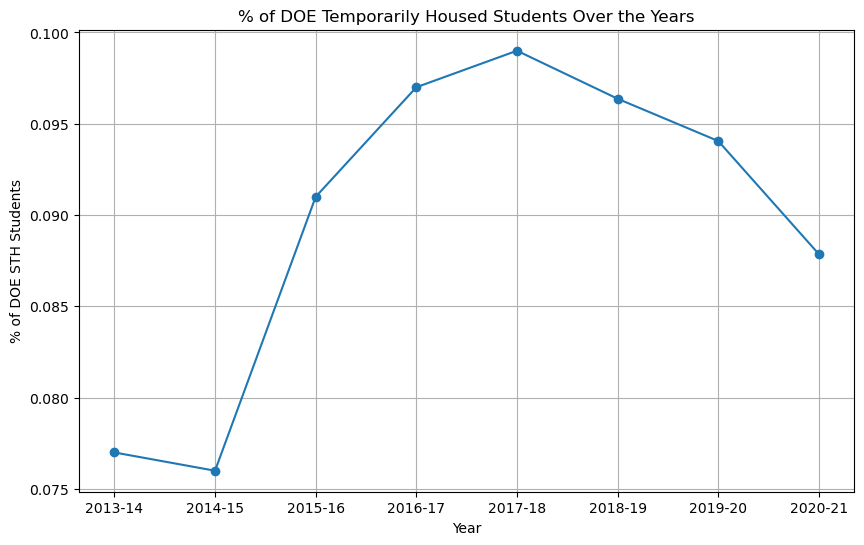

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(citywide_housing['Year'], citywide_housing['% DOE STH'], marker='o', linestyle='-')
plt.title('% of DOE Temporarily Housed Students Over the Years')
plt.xlabel('Year')
plt.ylabel('% of DOE STH Students')
plt.grid(True)
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_5304\2633167039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_data['month'] = school_data['month'].dt.start_time


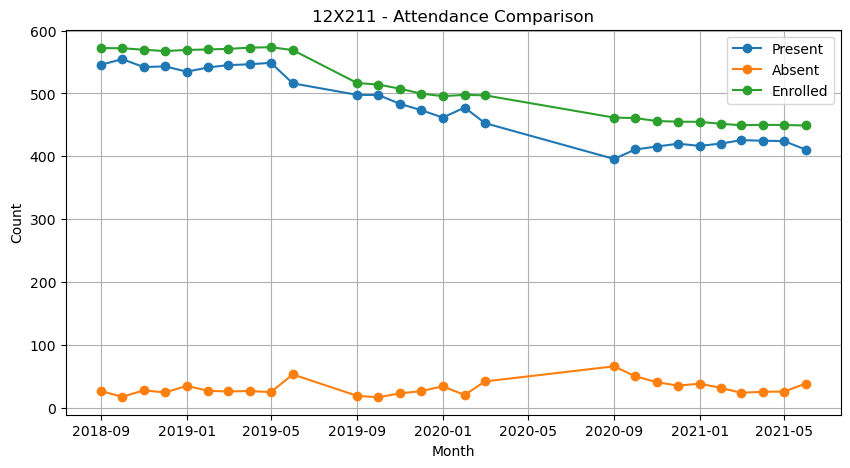

In [56]:
school_data = attendance[attendance['DBN'] == '12X211']

school_data['month'] = school_data['month'].dt.start_time
plt.figure(figsize=(10, 5))

plt.plot(school_data['month'], school_data['avg_present'], label='Present', marker='o')
plt.plot(school_data['month'], school_data['avg_absent'], label='Absent', marker='o')
plt.plot(school_data['month'], school_data['avg_enrolled'], label='Enrolled', marker='o')

plt.title('12X211 - Attendance Comparison')
plt.xlabel('Month')
plt.ylabel('Count')

plt.legend()
plt.grid(True)

plt.show()

In [2]:
transformed_attendance = pd.read_csv("../transformed_data/transformed_attendance.csv")

In [4]:
transformed_attendance['Year'].unique()

array(['2018-19', '2019-20', '2020-21'], dtype=object)

In [5]:
transformed_attendance['Year'] = transformed_attendance['Year'].str.split('-').str[0]

In [10]:
transformed_attendance = transformed_attendance.drop(columns='month',axis=1)

In [15]:
transformed_attendance['District'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 75],
      dtype=int64)

In [23]:
transformed_attendance = transformed_attendance[transformed_attendance['District'] != 75]

In [26]:
transformed_attendance['Attendance Rate']

0      0.929106
1      0.929254
2      0.912582
3      0.911781
4      0.885867
         ...   
859    0.895798
860    0.897282
861    0.899532
862    0.899745
863    0.853856
Name: Attendance Rate, Length: 864, dtype: float64

In [27]:
transformed_attendance.to_csv('transformed_attendance.csv', index=False)